# Урок 1. Алгоритм линейной регрессии. Градиентный спуск

Рекомендации по оформлению кода:
исправляя код из ноутбука, указывайте, пожалуйста, где были сделаны изменения, чтобы было легче ориентироваться в коде, к тому же это повысит скорость проверки работы.

Домашнее задание:
Используя файл Lesson_1_extended.ipynb (он в web1.zip в материалах):
Подберите скорость обучения и количество итераций
В коде есть ошибка, исправьте ее.
Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога эпсилон.


### 1. Подберите скорость обучения (eta) и количество итераций

Задача: предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [98]:
import numpy as np
import matplotlib.pyplot as plt

In [99]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])
# 1 - константный признак (нужен для нулевого веса, для сдвига)

In [100]:
X.shape
# у нас 10 наблюдений и 2 признака

(10, 2)

In [101]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]
# целевая переменная

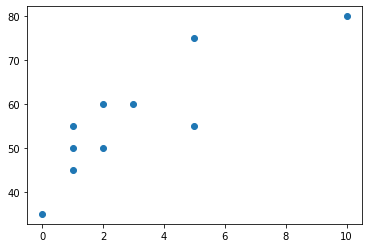

In [102]:
plt.scatter(X[:, 1], y);
# посмотрим зависимость целевой переменной от признака

Уравнение прямой:  𝑦 = 𝑎 ∗ 𝑥 + 𝑏

In [103]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

Инициализируем веса маленькими величинами:

In [104]:
W = np.array([0.5, 0.5])

In [105]:
n = X.shape[0]

In [106]:
# зададим скорость обучения и количество итераций
# если ошибка будет изменяться очень мало, то увеличим скорость обучения, 
# т.е. позволим градиентному спуску шагать более широко
eta = 1e-1
n_iter = 1000

In [107]:
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

Number of objects = 10        
Learning rate = 0.1        
Initial weights = [0.5 0.5] 



In [108]:
# цикл обучения:
for i in range(n_iter):
    y_pred = np.dot(X, W) # на каждой итерации смотрим какие предсказания имеются
    err = calc_mse(y, y_pred) # среднеквадратическая ошибка
    for k in range(W.shape[0]): # изменяем веса в цикле
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y)) # умножаем скорость обучения на градиент (происходит оптимизация веса)
    if i % 10 == 0:
        eta /= 1.1 # спасает от расползания ошибки до бесконечности
        print(eta)
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

0.09090909090909091
Iteration #0: W_new = [11.4 38.5], MSE = 3102.0
0.08264462809917356
Iteration #10: W_new = [12752.8082105  70175.53377537], MSE = 18605907474.13
0.07513148009015777
Iteration #20: W_new = [ 7794462.78878402 42983671.5156699 ], MSE = 9275866959916852.0
0.06830134553650706
Iteration #30: W_new = [1.07197580e+09 5.91159034e+09], MSE = 2.3654185763886816e+20
0.0620921323059155
Iteration #40: W_new = [3.02534648e+10 1.66837812e+11], MSE = 2.5861306182234217e+23
0.056447393005377725
Iteration #50: W_new = [1.56591497e+11 8.63550102e+11], MSE = 9.726486449868705e+24
0.051315811823070656
Iteration #60: W_new = [1.28767019e+11 7.10107349e+11], MSE = 9.502114053142176e+24
0.04665073802097332
Iteration #70: W_new = [1.39250106e+10 7.67918089e+10], MSE = 1.667289958811078e+23
0.04240976183724847
Iteration #80: W_new = [1.52890895e+08 8.43142271e+08], MSE = 3.175879727287169e+19
0.03855432894295315
Iteration #90: W_new = [117328.84387172 646785.89212586], MSE = 31821746616003.92

### 2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-34-df00614f0fcc> in <module>
     15 #         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
     16     # ИЗМЕНЕНИЯ
---> 17     W -= eta * (1/n * 2 * np.dot(X, y_pred - y))
     18     #
     19     if i % 10 == 0:

<__array_function__ internals> in dot(*args, **kwargs)

ValueError: shapes (10,2) and (10,) not aligned: 2 (dim 1) != 10 (dim 0)
   
    Матрицы можно перемножить только если количество столбцов одной матрицы совпадают с количеством строк другой.
    В данном случае видим несовпадение, значит нам нужно матрицу Х транспонировать.

In [109]:
n = X.shape[0]

eta = 1e-2 
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИЗМЕНЕНИЯ: транспонируем матрицу
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    #
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')


Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27


### 3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога  𝜖 .

Норма — функционал, заданный на векторном пространстве и обобщающий понятие длины вектора или абсолютного значения числа.


In [110]:
# зададим векторы
weights0 = np.array([0.5, 0.5])
weights1 = np.array([2.5, 1.5])


In [111]:
# найдем растояние между весами (векторами)
np.linalg.norm(weights0 - weights1, ord=2)

2.23606797749979

In [112]:
# визуализируем
def plot_vectors(a, b):
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot([a[0]], [a[1]], '*', c='r')
    ax.plot([b[0]], [b[1]], '+', c='g')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    return ax

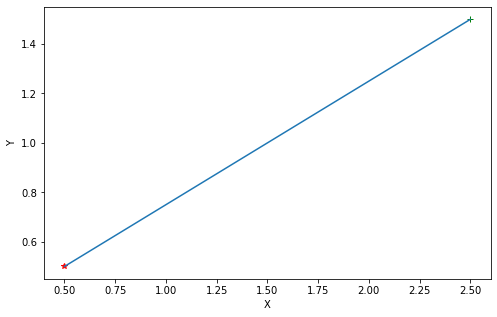

In [113]:
ax = plot_vectors(weights0, weights1)
ax.plot([weights0[0], weights1[0]], [weights0[1], weights1[1]]);

L2 norm / Евклидова метрика:
Евклидова метрика (евклидово расстояние) — метрика в евклидовом пространстве — расстояние между двумя точками евклидова пространства, вычисляемое по теореме Пифагора. 

a ** 2 + b ** 2 = c ** 2


In [114]:
# найдем растояние между весами (векторами)
((weights1[0]-weights0[0])**2 + (weights1[1] - weights0[1])**2)**0.5

2.23606797749979

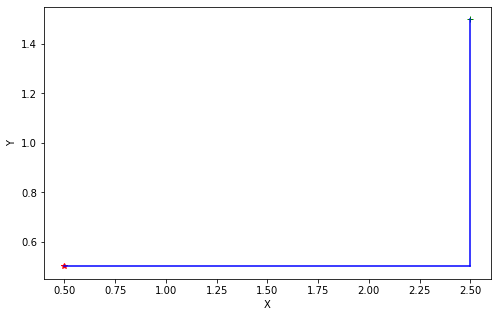

In [115]:
# визуализируем
ax = plot_vectors(weights0, weights1)
ax.plot([weights0[0], weights1[0]], [weights0[1], weights0[1]], c='b')
ax.plot([weights1[0], weights1[0]], [weights0[1], weights1[1]], c='b');

L1 norm / Расстояние городских кварталов:
Расстояние городских кварталов d1 между двумя векторами p,q в n-мерном вещественном векторном пространстве с заданной системой координат — сумма длин проекций отрезка между точками на оси координат. на плоскости расстояние городских кварталов между (p_{1},p_{2}) и  (q_{1},q_{2}) равно |p_{1}-q_{1}|+|p_{2}-q_{2}|.

abs(p1-q1) + abs(p2-q2)


In [116]:
abs(weights1[0]-weights0[0]) + abs(weights1[1] - weights0[1])


3.0

У нас получилось 3 варианта расстояний, можем брать любое, чаще всего это l1 или l2.

In [117]:
n = X.shape[0]

eta = 1e-2 
epsilon = 1e-5
iter_num = 0

# инициализируем веса маленькими величинами
W = np.array([0.5, 0.5])

print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

# задаем изначально бесконечно большое число
weight_dist = np.inf

while weight_dist > epsilon:
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
# умножаем скорость обучения на градиент (происходит оптимизация веса)
    W_new = W - eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    
# находим растояние между весами (векторами)    
    weight_dist = np.linalg.norm(W_new - W, ord=2)
    
    W = W_new.copy()
    
    if iter_num % 10 == 0:
        print(f'Iteration #{iter_num}: W_new = {W}, MSE = {round(err,2)}')
    iter_num += 1

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [0.5 0.5] 

Iteration #0: W_new = [1.59 4.3 ], MSE = 3102.0
Iteration #10: W_new = [ 6.56331187 10.69550943], MSE = 754.73
Iteration #20: W_new = [ 9.94926955 10.17843838], MSE = 635.4
Iteration #30: W_new = [13.02350016  9.62226131], MSE = 536.38
Iteration #40: W_new = [15.82839082  9.11365473], MSE = 453.94
Iteration #50: W_new = [18.38772168  8.64955977], MSE = 385.3
Iteration #60: W_new = [20.72299319  8.22609429], MSE = 328.15
Iteration #70: W_new = [22.8538209   7.83970154], MSE = 280.57
Iteration #80: W_new = [24.79810306  7.48713594], MSE = 240.96
Iteration #90: W_new = [26.572171    7.16543608], MSE = 207.97
Iteration #100: W_new = [28.19092629  6.87189976], MSE = 180.52
Iteration #110: W_new = [29.66796594  6.60406139], MSE = 157.65
Iteration #120: W_new = [31.01569661  6.35967122], MSE = 138.62
Iteration #130: W_new = [32.24543878  6.13667644], MSE = 122.77
Iteration #140: W_new = [33.36752188  5.9